In [25]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
# Setting up training data
training_data = pd.read_csv("mitbih_test.csv", header=None)
len(training_data.columns)


188

In [9]:
# Setting up testing data
test_data = pd.read_csv("mitbih_test.csv")
df_test  = pd.DataFrame(test_data)
df_test

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,3.099173493683338165e-02,2.892562001943588257e-02,3.512396663427352905e-02.1,2.685950323939323425e-02,3.925620019435882568e-02,3.512396663427352905e-02.2,4.338843002915382385e-02,4.752065986394882202e-02.1,5.371900647878646851e-02,5.371900647878646851e-02.1,7.024793326854705811e-02,7.231404632329940796e-02,8.471074700355529785e-02,9.710744023323059082e-02,1.219008266925811768e-01,1.322313994169235229e-01,1.694214940071105957e-01,1.962809860706329346e-01,2.148760259151458740e-01,2.355371862649917603e-01,2.541322410106658936e-01,2.644627988338470459e-01,2.851239740848541260e-01,2.727272808551788330e-01,2.665289342403411865e-01,2.396694272756576538e-01,2.148760259151458740e-01.1,1.735537201166152954e-01,1.570248007774353027e-01,1.239669397473335266e-01,...,0.000000000000000000e+00.26,0.000000000000000000e+00.27,0.000000000000000000e+00.28,0.000000000000000000e+00.29,0.000000000000000000e+00.30,0.000000000000000000e+00.31,0.000000000000000000e+00.32,0.000000000000000000e+00.33,0.000000000000000000e+00.34,0.000000000000000000e+00.35,0.000000000000000000e+00.36,0.000000000000000000e+00.37,0.000000000000000000e+00.38,0.000000000000000000e+00.39,0.000000000000000000e+00.40,0.000000000000000000e+00.41,0.000000000000000000e+00.42,0.000000000000000000e+00.43,0.000000000000000000e+00.44,0.000000000000000000e+00.45,0.000000000000000000e+00.46,0.000000000000000000e+00.47,0.000000000000000000e+00.48,0.000000000000000000e+00.49,0.000000000000000000e+00.50,0.000000000000000000e+00.51,0.000000000000000000e+00.52,0.000000000000000000e+00.53,0.000000000000000000e+00.54,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.3691

In [12]:

def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    size = X.shape[0]
    for j in range(size):
        for i in range(188 - time_steps):
            #print(f"i = {i}")
            #print(f"j = {j}")
            v = X.iloc[j][i:(i + time_steps)].values
            #print(np.matrix(v).T)
            Xs.append(np.matrix(v).T)        
            ys.append(X.iloc[j][i + time_steps])
        if j % 50:
          print(j)
    return np.array(Xs), np.array(ys)

In [11]:
X_train, y_train = create_dataset(df_test[:1000], 10)

In [22]:
pd.DataFrame(np.array(df_test.iloc[1000]).reshape((1,188)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.985755,0.792023,0.612536,0.39886,0.250712,0.145299,0.039886,0.019943,0.0,0.0,0.002849,0.008547,0.005698,0.019943,0.008547,0.031339,0.008547,0.014245,0.005698,0.025641,0.014245,0.019943,0.008547,0.025641,0.019943,0.039886,0.054131,0.08547,0.102564,0.14245,0.153846,0.190883,0.19943,0.222222,0.210826,0.205128,0.188034,0.185185,0.165242,0.156695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_test, y_test   = create_dataset(df_test[1000:1003], 10)

1
2


In [29]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [30]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
10013/10013 [==============================] - 98s 10ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 2/30
10013/10013 [==============================] - 99s 10ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 3/30
10013/10013 [==============================] - 98s 10ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/30
10013/10013 [==============================] - 97s 10ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/30
10013/10013 [==============================] - 100s 10ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 6/30
10013/10013 [==============================] - 96s 10ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/30
10013/10013 [==============================] - 95s 10ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/30
10013/10013 [==============================] - 95s 9ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/30
10013/10013 [==============================] - 96s 10ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/30
10013/10013 [=====================

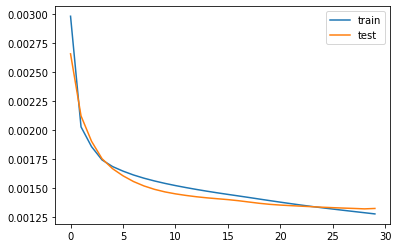

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [40]:
y_pred = model.predict(X_test)

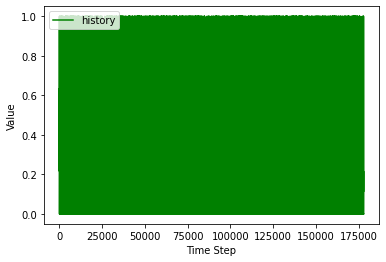

In [45]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();


In [47]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

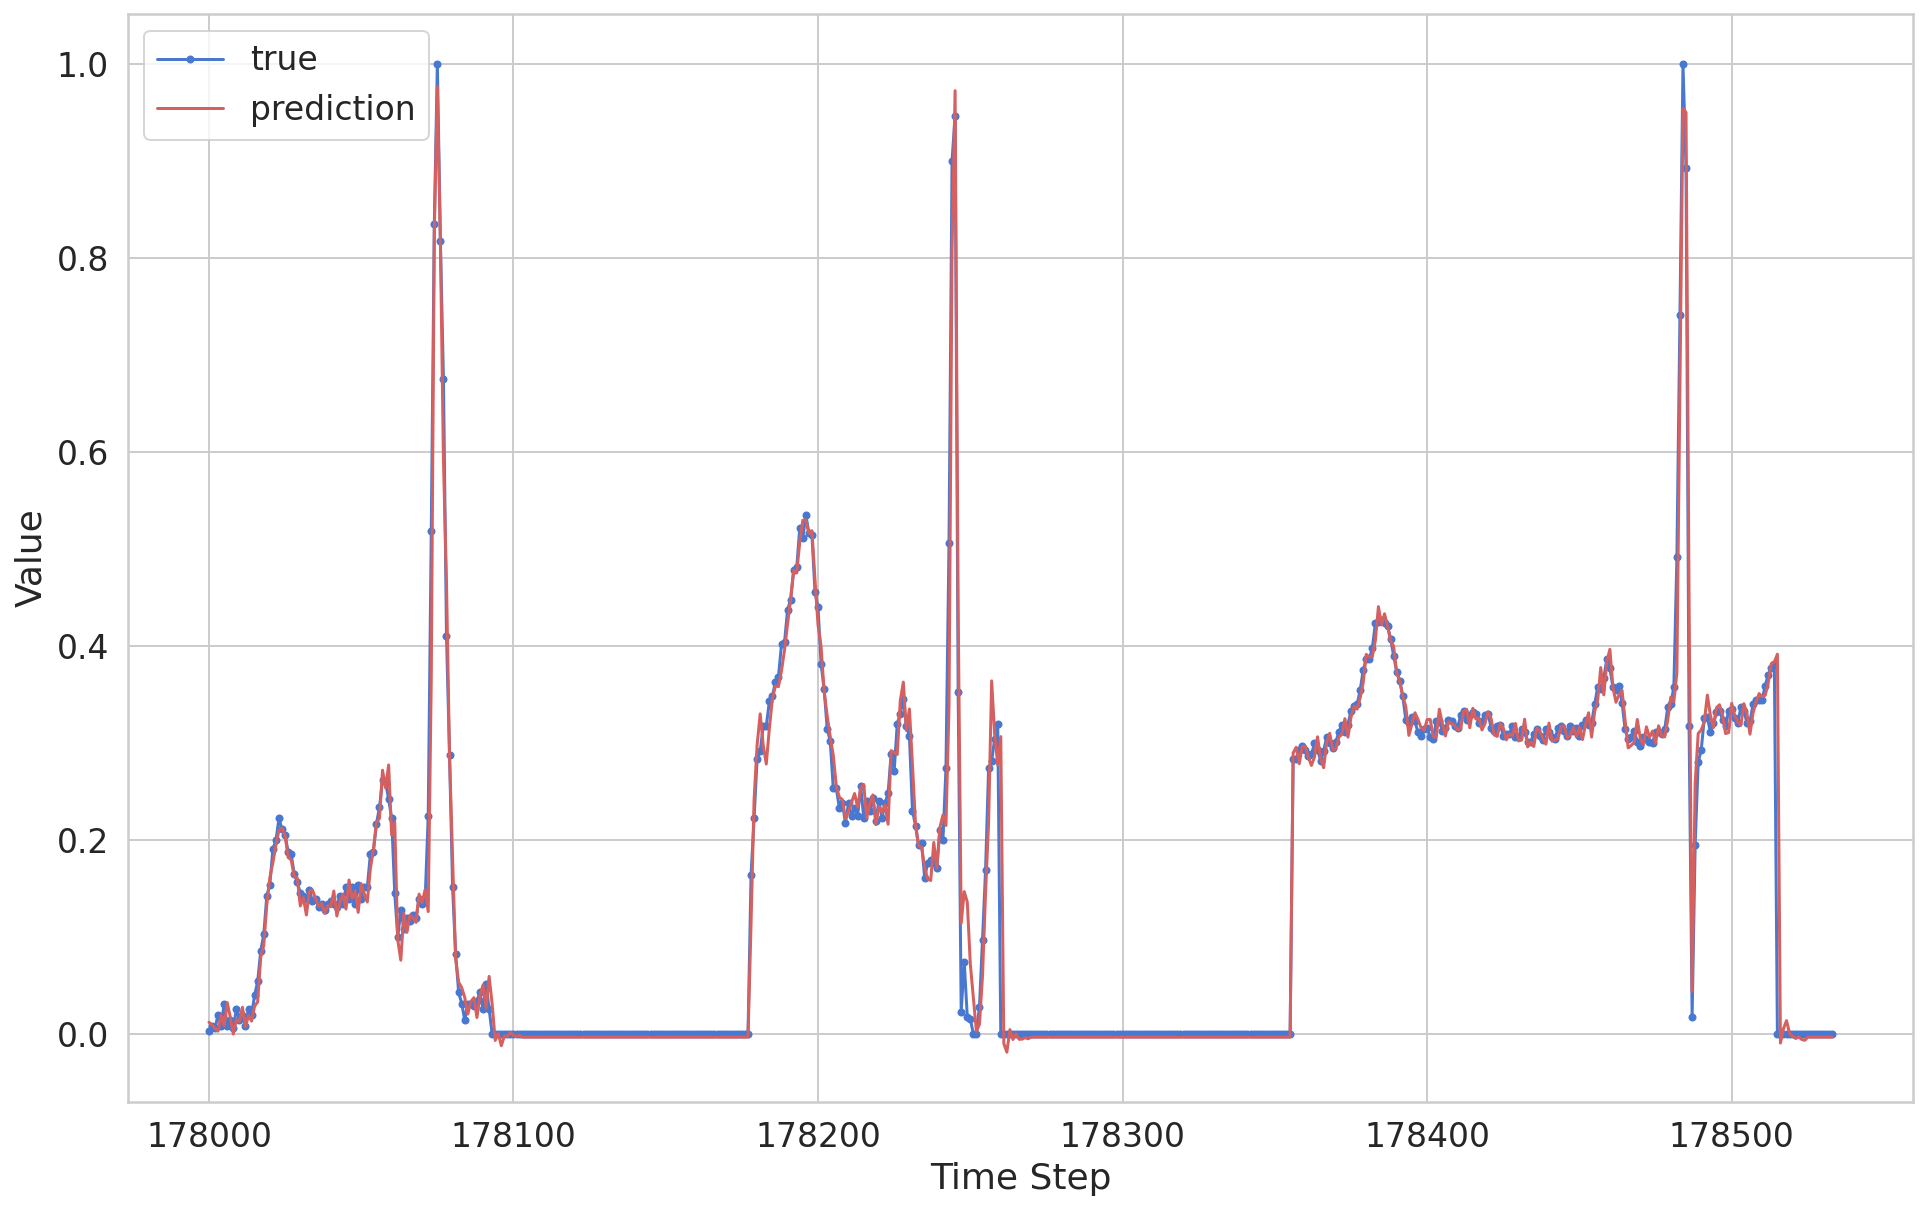

In [49]:
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();